### Download data

In [ ]:
!pip install -U -q PyDrive
!pip uninstall tensorflow -y
!pip install  tensorflow==2.9.*

Found existing installation: tensorflow 2.9.3
Uninstalling tensorflow-2.9.3:
  Successfully uninstalled tensorflow-2.9.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.8 MB)


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1sNjXqBEo_syiwh9I6GzM3Gw5sSyG3Jan"
# https://drive.google.com/file/d/1sNjXqBEo_syiwh9I6GzM3Gw5sSyG3Jan/view?usp=share_link

In [ ]:

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Landmarks-v1_0.zip') 

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import patoolib
patoolib.extract_archive("Landmarks-v1_0.zip")

patool: Extracting Landmarks-v1_0.zip ...
patool: running /usr/bin/7z x -o./Unpack_0mcpz44c -- Landmarks-v1_0.zip
patool: ... Landmarks-v1_0.zip extracted to `Landmarks-v1_02' (multiple files in root).


'Landmarks-v1_02'

### Split data

In [ ]:

from PIL import Image
import numpy as np
import os

# Set the path to the folder containing the landmark images
path = "Landmarks-v1_0"

# Set the target size for the images
target_size = (224, 224)

In [ ]:
!pip install pillow pillow-avif-plugin
import pillow_avif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
for category in os.listdir(path):
    category_path = os.path.join(path, category)
    for landmark in os.listdir(category_path):
        landmark_path = os.path.join(category_path, landmark)
        for filename in os.listdir(landmark_path):
            image_path = os.path.join(landmark_path, filename)
            # Load the image using Pillow
            # if os.path.splitext(image_path)[1] == '.avif':
            #     # Load the AVIF image using avifio
            #     # image_array = imageio.imread(image_path)
            #     # image = Image.fromarray(np.array(image_array).astype('uint8'))
            #     image = Image.open(image_path)
            # else:
            #     # Load the image using PIL
            #     image = Image.open(image_path)
            image = Image.open(image_path)
            # Resize the image
            image = image.resize(target_size)
            # Crop the image
            # Here, we crop the center of the image
            # width, height = image.size
            # left = (width - target_size[0]) // 2
            # top = (height - target_size[1]) // 2
            # right = left + target_size[0]
            # bottom = top + target_size[1]
            # image = image.crop((left, top, right, bottom))
            # Normalize the image
            # Here, we normalize the pixel values to be between 0 and 1
            image_array = np.array(image).astype(np.uint8)
            image_min = image_array.min()
            image_max = image_array.max()
            image_normalized = (image_array - image_min) / (image_max - image_min)
            image = Image.fromarray((image_normalized*255).astype(np.uint8))
            # Save the preprocessed image
            image_name, image_ext = os.path.splitext(filename)
            preprocessed_image_path = os.path.join(landmark_path, image_name + "_preprocessed.jpg")
            os.remove(image_path)
            # image = image.convert('RGB')
            image.save(preprocessed_image_path)

In [ ]:
import imgaug.augmenters as iaa

# Define the augmentation pipeline
seq = iaa.Sequential([
    iaa.Flipud(p=0.5),  # vertically flip the image with 50% probability
    iaa.Affine(rotate=(-10, 10)),  # rotate the image by -10 to 10 degrees
    iaa.Affine(translate_px={"x": (-20, 20), "y": (-20, 20)}),  # translate the image horizontally and vertically by -20 to 20 pixels
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # add Gaussian noise with a standard deviation of 0 to 0.05*255
    iaa.Multiply((0.5, 1.5)),  # multiply the pixel values by a random value between 0.5 and 1.5
])

# Loop over the categories and landmarks folders
for category in os.listdir(path):
    category_path = os.path.join(path, category)
    for landmark in os.listdir(category_path):
        landmark_path = os.path.join(category_path, landmark)
        for filename in os.listdir(landmark_path):
            image_path = os.path.join(landmark_path, filename)
            # Load the preprocessed image using Pillow
            image = Image.open(image_path)
            # Convert the image to a numpy array
            image = np.array(image)
            # Apply the augmentation pipeline
            augmented_images = seq(images=[image])
            # Save the augmented images
            image_name, image_ext = os.path.splitext(filename)
            for j, augmented_image in enumerate(augmented_images):
                Image.fromarray(augmented_image.astype(np.uint8)).save(os.path.join(landmark_path, image_name + "_augmented_" + str(j) + ".jpg"))

In [ ]:
!pip install pillow pillow-avif-plugin
import pillow_avif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
for category in os.listdir(path):
    category_path = os.path.join(path, category)
    for landmark in os.listdir(category_path):
        landmark_path = os.path.join(category_path, landmark)
        for filename in os.listdir(landmark_path):
            image_path = os.path.join(landmark_path, filename)
            # Load the image using Pillow
            # if os.path.splitext(image_path)[1] == '.avif':
            #     # Load the AVIF image using avifio
            #     # image_array = imageio.imread(image_path)
            #     # image = Image.fromarray(np.array(image_array).astype('uint8'))
            #     image = Image.open(image_path)
            # else:
            #     # Load the image using PIL
            #     image = Image.open(image_path)
            image = Image.open(image_path)
            # Resize the image
            image = image.resize(target_size)
            # Crop the image
            # Here, we crop the center of the image
            # width, height = image.size
            # left = (width - target_size[0]) // 2
            # top = (height - target_size[1]) // 2
            # right = left + target_size[0]
            # bottom = top + target_size[1]
            # image = image.crop((left, top, right, bottom))
            # Normalize the image
            # Here, we normalize the pixel values to be between 0 and 1
            image_array = np.array(image).astype(np.uint8)
            image_min = image_array.min()
            image_max = image_array.max()
            image_normalized = (image_array - image_min) / (image_max - image_min)
            image = Image.fromarray((image_normalized*255).astype(np.uint8))
            # Save the preprocessed image
            image_name, image_ext = os.path.splitext(filename)
            preprocessed_image_path = os.path.join(landmark_path, image_name + "_preprocessed.jpg")
            os.remove(image_path)
            # image = image.convert('RGB')
            image.save(preprocessed_image_path)

In [ ]:
import imgaug.augmenters as iaa

# Define the augmentation pipeline
seq = iaa.Sequential([
    iaa.Flipud(p=0.5),  # vertically flip the image with 50% probability
    iaa.Affine(rotate=(-10, 10)),  # rotate the image by -10 to 10 degrees
    iaa.Affine(translate_px={"x": (-20, 20), "y": (-20, 20)}),  # translate the image horizontally and vertically by -20 to 20 pixels
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # add Gaussian noise with a standard deviation of 0 to 0.05*255
    iaa.Multiply((0.5, 1.5)),  # multiply the pixel values by a random value between 0.5 and 1.5
])

# Loop over the categories and landmarks folders
for category in os.listdir(path):
    category_path = os.path.join(path, category)
    for landmark in os.listdir(category_path):
        landmark_path = os.path.join(category_path, landmark)
        for filename in os.listdir(landmark_path):
            image_path = os.path.join(landmark_path, filename)
            # Load the preprocessed image using Pillow
            image = Image.open(image_path)
            # Convert the image to a numpy array
            image = np.array(image)
            # Apply the augmentation pipeline
            augmented_images = seq(images=[image])
            # Save the augmented images
            image_name, image_ext = os.path.splitext(filename)
            for j, augmented_image in enumerate(augmented_images):
                Image.fromarray(augmented_image.astype(np.uint8)).save(os.path.join(landmark_path, image_name + "_augmented_" + str(j) + ".jpg"))

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import os

In [ ]:
data_dir = "Landmarks-v1_0"
valid_size = 0.2
test_size = 0.2


categories_train_dir = "categories_train"
categories_test_dir = "categories_test"
categories_valid_dir = "categories_valid"

landmarks_train_dir = "landmarks_train"
landmarks_test_dir = "landmarks_test"
landmarks_valid_dir = "landmarks_valid"

In [ ]:
categories = os.listdir(data_dir)

for category in categories:
    category_dir = os.path.join(data_dir, category)
    
    # I test the code in macos environment, this if statement is for the bug only happens in macos
    if category == ".DS_Store":
        continue

    landmarks = os.listdir(category_dir)
    
    for landmark in landmarks:
        
        if landmark == ".DS_Store":
            continue
        
        # image data path
        image_dir = os.path.join(category_dir, landmark)
        
        landmark_dir = os.path.join(data_dir, landmark)
        
        # image data
        images = os.listdir(image_dir)
        
        # split data into test, validation and train
        train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
        # train_images, valid_images = train_test_split(train_images, test_size=valid_size, random_state=42)

        os.makedirs(os.path.join(categories_train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(categories_test_dir, category), exist_ok=True)
        os.makedirs(os.path.join(categories_valid_dir, category), exist_ok=True)
        os.makedirs(os.path.join(landmarks_train_dir, landmark), exist_ok=True)
        os.makedirs(os.path.join(landmarks_test_dir, landmark), exist_ok=True)
        os.makedirs(os.path.join(landmarks_valid_dir, landmark), exist_ok=True)

        # copy all files in the new floders
        for image in train_images:
            shutil.copy(os.path.join(image_dir, image), os.path.join(categories_train_dir, category, image))
            shutil.copy(os.path.join(image_dir, image), os.path.join(landmarks_train_dir, landmark, image))
        for image in test_images:
            shutil.copy(os.path.join(image_dir, image), os.path.join(categories_test_dir, category, image))
            shutil.copy(os.path.join(image_dir, image), os.path.join(landmarks_test_dir, landmark, image))
        # for image in valid_images:
        #     shutil.copy(os.path.join(image_dir, image), os.path.join(categories_valid_dir, category, image))
        #     shutil.copy(os.path.join(image_dir, image), os.path.join(landmarks_valid_dir, landmark, image))

### Model building

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import sys

#### Data Augmentation

In [ ]:
# Adjust brightness
def adjust_brightness(image):
    delta = 0.2  # Change this value to adjust the brightness level
    return tf.image.adjust_brightness(image, delta)

# Adjust saturation
def adjust_saturation(image):
    saturation_factor = 1.5  # Change this value to adjust the saturation level
    return tf.image.adjust_saturation(image, saturation_factor)

# Adjust hue
def adjust_hue(image):
    delta = 0.1  # Change this value to adjust the hue level
    return tf.image.adjust_hue(image, delta)

# Adjust gamma
def adjust_gamma(image):
    gamma = 1.5  # Change this value to adjust the gamma level
    gain = 1.0  # Change this value to adjust the gain
    return tf.image.adjust_gamma(image, gamma, gain)

# Edge detection
def sobel_filter(image):
    image = tf.cast(image, tf.float32)
    image = tf.expand_dims(image, 0)
    sobel = tf.image.sobel_edges(image)
    sobel_y = np.asarray(sobel[0, :, :, :, 0]) # sobel in y-direction
    sobel_x = np.asarray(sobel[0, :, :, :, 1]) # sobel in x-direction
    # magnitude = tf.sqrt(tf.reduce_sum(tf.square(sobel_x), axis=-1) + tf.reduce_sum(tf.square(sobel_y), axis=-1))
    magnitude = tf.sqrt(tf.square(sobel_x) + tf.square(sobel_y))
    return magnitude
    # return magnitude

# RGB to grey
def rgb_to_grey(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

def combined_preprocessing(image):
    # tf.convert_to_tensor(image)
    # image = rgb_to_grey(image)
    image = adjust_brightness(image)
    image = adjust_saturation(image)
    image = adjust_hue(image)
    image = adjust_gamma(image)
    # image = sobel_filter(image)
    # image = rgb_to_grey(image)
    return image

# # load an image from a file
# image = tf.keras.preprocessing.image.load_img('/content/categories_test/Gothic/ChartresCathedral5.jpeg')
# # convert the image to a tensor
# # img_tensor = tf.keras.preprocessing.image.img_to_array(img)
# image = combined_preprocessing(image)
# # image = tf.image.rgb_to_grayscale(image)
# # tf.print(image, output_stream=sys.stdout)
# # convert the tensor to a PIL image
# pil_image = array_to_img(image)

# display the image using matplotlib
# plt.imshow(pil_image)
# plt.show()

In [ ]:
categories_train_dir = "categories_train"
categories_valid_dir = "categories_valid"
categories_test_dir = "categories_test"

landmarks_train_dir = "landmarks_train"
landmarks_valid_dir = "landmarks_valid"
landmarks_test_dir = "landmarks_test"

dict_param = { 
    'rescale' : 1./255,
    'preprocessing_function' : combined_preprocessing
}

dict_param_train = {
    'rescale' : 1./255,
    'rotation_range' : 20,
    'width_shift_range' : 0.2,
    'height_shift_range' :0.2,
    'shear_range' : 0.2,
    'zoom_range' : 0.2,
    'horizontal_flip' : True,
    'fill_mode' : 'nearest',
    'preprocessing_function' : combined_preprocessing
}

train_datagen = ImageDataGenerator(**dict_param_train)

test_datagen = ImageDataGenerator(**dict_param)

# Set the target size for the images (Both EfficientNetB0 and VGG16 input size is 224x224)
target_size = (224, 224)

category_train_generator = train_datagen.flow_from_directory(
        categories_train_dir,
        target_size=target_size,
        batch_size=26,
        class_mode='categorical')

category_test_generator = test_datagen.flow_from_directory(
        categories_test_dir,
        target_size=target_size,
        batch_size=43,
        class_mode='categorical',
        shuffle=False)

landmark_train_generator = train_datagen.flow_from_directory(
        landmarks_train_dir,
        target_size=target_size,
        batch_size=26,
        class_mode='categorical')

landmark_test_generator = test_datagen.flow_from_directory(
        landmarks_test_dir,
        target_size=target_size,
        batch_size=43,
        class_mode='categorical',
        shuffle=False)

Found 1634 images belonging to 6 classes.
Found 444 images belonging to 6 classes.
Found 1634 images belonging to 30 classes.
Found 444 images belonging to 30 classes.


#### Model Training

In [ ]:
tf.__version__
# category_model.save('category_classification.h5')
from google.colab import files
# files.download("/content/category_classification.h5")

In [ ]:
def model_train(train_generator, test_generator, base_model, dense, e, name):

    # freezing layer
    for layer in base_model.layers[:-20]:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(dense, activation='softmax')
    ])

    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_generator,
        steps_per_epoch=12,
        epochs=e,
        validation_data=test_generator,
        validation_steps=2)
    
    model.save(name)
    files.download("/content/" + name)

    return model, history

In [ ]:
# categories
categories = ['Pagodas','Pyramids','Modern','Gothic','Mughal','Neoclassical']

# landmarks
landmarks = [
      'TianningTemplePagoda','ThienMuPagoda','GiantWildGoosePagoda','ShwedagonPagoda',
      'FogongTemplePagoda','Pyramid of Giza','Pyramid of Djoser','Santa Cecilia Acatitlan Pyramid',
      'El Castillo, Chichen Itza','Louvre Pyramid','Chrysler Building','Cathedral of Brasília',
      'CCTV Headquarters','Hallgrímskirkja','eiffel','St.VitusCathedral',
      'MilanCathedral','ChartresCathedral','CologneCathedral','Notre-DameCathedral',
      'Taj Mahal','Tomb of Akbar','Jama Masjid','Tomb of I_timad-ud-Daulah',
      'Bibi Ka Maqbara','Buckingham Palace','Concertgebouw',
      'Academy of Athens','Panthéon','Ripon Building','other']

EFN = EfficientNetB0(
    include_top=False, 
    weights='imagenet', 
    input_shape=target_size + (3,))

# VGG = vgg16.VGG16(    
#     include_top=False,
#     weights='imagenet',
#     input_shape=target_size + (3,))

# model_VGG = model_compile(train_generator, test_generator, VGG, target_size)

In [ ]:
category_model, category_history = model_train(category_train_generator, category_test_generator,
                                               EFN, len(categories), 24, 'category_classification.h5')

Epoch 1/24
12/12 [==============================] - 18s 1s/step - loss: 1.2860 - accuracy: 0.5065 - val_loss: 0.7850 - val_accuracy: 0.7907
Epoch 2/24
12/12 [==============================] - 10s 866ms/step - loss: 0.5763 - accuracy: 0.8269 - val_loss: 0.5085 - val_accuracy: 0.8605
Epoch 3/24
12/12 [==============================] - 8s 651ms/step - loss: 0.4109 - accuracy: 0.8718 - val_loss: 0.5742 - val_accuracy: 0.7791
Epoch 4/24
12/12 [==============================] - 10s 799ms/step - loss: 0.3596 - accuracy: 0.8910 - val_loss: 0.5548 - val_accuracy: 0.8023
Epoch 5/24
12/12 [==============================] - 8s 712ms/step - loss: 0.3074 - accuracy: 0.8974 - val_loss: 0.3006 - val_accuracy: 0.8721
Epoch 6/24
12/12 [==============================] - 9s 724ms/step - loss: 0.2684 - accuracy: 0.8974 - val_loss: 0.1328 - val_accuracy: 0.9535
Epoch 7/24
12/12 [==============================] - 12s 1s/step - loss: 0.2944 - accuracy: 0.8910 - val_loss: 0.0945 - val_accuracy: 0.9651
Epoch 8/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# category_model.save('category_classification.h5')
# from google.colab import files
# files.download("/content/category_classification.h5")

In [ ]:
landmark_model, landmark_history = model_train(landmark_train_generator, landmark_test_generator, EFN, len(landmarks)-1, 24,'landmark_classification.h5')

Epoch 1/24
12/12 [==============================] - 17s 814ms/step - loss: 2.6171 - accuracy: 0.2756 - val_loss: 1.3711 - val_accuracy: 0.5233
Epoch 2/24
12/12 [==============================] - 11s 917ms/step - loss: 1.2482 - accuracy: 0.6699 - val_loss: 0.6785 - val_accuracy: 0.7791
Epoch 3/24
12/12 [==============================] - 8s 676ms/step - loss: 0.8641 - accuracy: 0.7565 - val_loss: 0.6915 - val_accuracy: 0.7558
Epoch 4/24
12/12 [==============================] - 9s 807ms/step - loss: 0.7276 - accuracy: 0.8013 - val_loss: 0.5849 - val_accuracy: 0.7674
Epoch 5/24
12/12 [==============================] - 8s 651ms/step - loss: 0.5717 - accuracy: 0.8279 - val_loss: 0.5073 - val_accuracy: 0.8372
Epoch 6/24
12/12 [==============================] - 10s 811ms/step - loss: 0.4700 - accuracy: 0.8654 - val_loss: 0.3320 - val_accuracy: 0.8953
Epoch 7/24
12/12 [==============================] - 8s 714ms/step - loss: 0.4148 - accuracy: 0.8942 - val_loss: 0.5415 - val_accuracy: 0.8023
Epo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# landmark_model.save('landmark_classification.h5')
# files.download("/content/landmark_classification.h5")

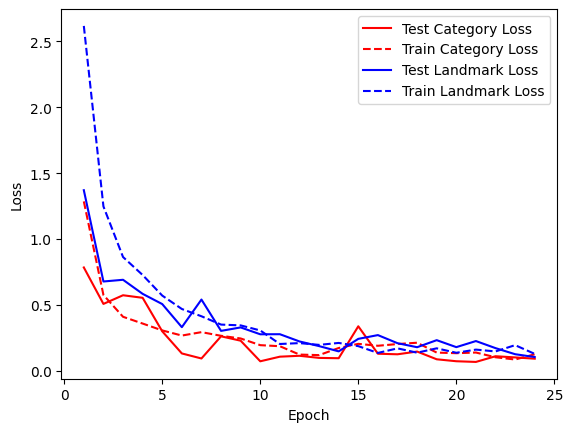

In [ ]:
# Get training and test loss histories
category_loss = category_history.history['val_loss']
category_training_loss = category_history.history['loss']
landmark_loss = landmark_history.history['val_loss']
landmark_training_loss = landmark_history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(category_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, category_loss, 'r-')
plt.plot(epoch_count, category_training_loss, 'r--')
plt.plot(epoch_count, landmark_loss, 'b-')
plt.plot(epoch_count, landmark_training_loss, 'b--')
plt.legend(['Test Category Loss', 'Train Category Loss', 'Test Landmark Loss', 'Train Landmark Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
# from sklearn.metrics import classification_report
# # Get the true labels and predicted labels from the test generator and the model, respectively
# test_generator = test_datagen.flow_from_directory(
#         categories_test_dir,
#         target_size=target_size,
#         batch_size=87,
#         class_mode='categorical')

# true_labels = test_generator.classes

# prediction = category_model.predict(
#     test_generator,
#     use_multiprocessing=True
# )
# predicted_labels = np.argmax(prediction, axis=1)
# print(predicted_labels)
# # Calculate the classification report
# report = classification_report(true_labels, predicted_labels, output_dict=True)

# # Extract the F1 macro score
# f1_macro_score = report["macro avg"]["f1-score"]
# print(f"F1 Macro Score: {f1_macro_score:.4f}")

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score
# from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
# from tensorflow.keras.utils import normalize

# def image_rescale(img):
#     # Convert the image to a numpy array
#     img_array = img_to_array(img)
#     # Rescale the image array
#     rescaled_img_array = img_array / 255.0
#     # Normalize the rescaled image array
#     normalized_img_array = normalize(rescaled_img_array, axis=-1)
#     # Convert the normalized image array back to an image
#     rescaled_img = array_to_img(normalized_img_array)
#     return rescaled_img

# categories = os.listdir("/content/categories_test")
# for category in categories:
#     category_dir = os.path.join("/content/categories_test", category)
#     images = os.listdir(category_dir)
#     for image in images:
#         image_dir = os.path.join(category_dir, image)
#         img = load_img(image_dir)
#         img = img.resize((224, 224))
#         img = combined_preprocessing(img)
#         img_array = np.array(img)
#         img_array = img_array / 255.0
#         img_array = img_array.reshape((1, 224, 224, 3))
#         # img = tf.keras.utils.array_to_img(img_array)
#         # print(tf.shape(img))
#         prediction = category_model.predict(img_array)   
#         label = np.argmax(prediction)   
#         print(category, label)  



# # true_labels = category_test_generator.classes
# # # prediction = category_model.predict(category_test_generator)
# # predicted_labels = np.argmax(category_model.predict(category_test_generator), axis=1)
# # predicted_labels2 = np.argmax(category_model.predict(category_test_generator), axis=1)
# # # Calculate the classification report
# # # report = classification_report(true_labels, predicted_labels, output_dict=True)

# # # Extract the F1 macro score
# # f1_macro_score = f1_score(true_labels, predicted_labels, average='macro')
# # print(f"F1 Macro Score: {f1_macro_score:.4f}")
# # print(predicted_labels)
# # print(predicted_labels2)

### Model combination

In [ ]:
# def add_information(image):
#     # 对新图像进行第一步分类
#     first_step_prediction = category_model.predict(image)

#     # 使用第一步分类的结果作为第二步分类的依据
#     second_step_input = tf.concat([image, first_step_prediction], axis=-1)

#     return second_step_input

# def second_process(image):
#     image = combined_preprocessing(image)
#     image = add_information(image)
#     return image

# dict_param = { 
#     'rescale' : 1./255,
#     'preprocessing_function' : second_process
# }

# dict_param_train = {
#     'rescale' : 1./255,
#     'rotation_range' : 20,
#     'width_shift_range' : 0.2,
#     'height_shift_range' :0.2,
#     'shear_range' : 0.2,
#     'zoom_range' : 0.2,
#     'horizontal_flip' : True,
#     'fill_mode' : 'nearest',
#     'preprocessing_function' : second_process
# }

# second_train_datagen = ImageDataGenerator(**dict_param_train)

# second_test_datagen = ImageDataGenerator(**dict_param)

# second_train_generator = train_datagen.flow_from_directory(
#         landmarks_train_dir,
#         target_size=target_size,
#         batch_size=26,
#         class_mode='categorical')

# second_test_generator = test_datagen.flow_from_directory(
#         landmarks_test_dir,
#         target_size=target_size,
#         batch_size=43,
#         class_mode='categorical')

# second_landmark_model = model_train(second_train_generator, second_test_generator, EFN, len(landmarks))

### Test

In [ ]:
# # Adjust brightness
# def adjust_brightness(image):
#     delta = 0.2  # Change this value to adjust the brightness level
#     return tf.image.adjust_brightness(image, delta)

# # Adjust saturation
# def adjust_saturation(image):
#     saturation_factor = 1.5  # Change this value to adjust the saturation level
#     return tf.image.adjust_saturation(image, saturation_factor)

# # Adjust hue
# def adjust_hue(image):
#     delta = 0.1  # Change this value to adjust the hue level
#     return tf.image.adjust_hue(image, delta)

# # Adjust gamma
# def adjust_gamma(image):
#     gamma = 1.5  # Change this value to adjust the gamma level
#     gain = 1.0  # Change this value to adjust the gain
#     return tf.image.adjust_gamma(image, gamma, gain)

# # Edge detection
# def sobel_filter(image):
#     image = tf.cast(image, tf.float32)
#     image = tf.expand_dims(image, 0)
#     sobel = tf.image.sobel_edges(image)
#     sobel_y = np.asarray(sobel[0, :, :, :, 0]) # sobel in y-direction
#     sobel_x = np.asarray(sobel[0, :, :, :, 1]) # sobel in x-direction
#     # magnitude = tf.sqrt(tf.reduce_sum(tf.square(sobel_x), axis=-1) + tf.reduce_sum(tf.square(sobel_y), axis=-1))
#     magnitude = tf.sqrt(tf.square(sobel_x) + tf.square(sobel_y))
#     return magnitude
#     # return magnitude

# # RGB to grey
# def rgb_to_grey(image):
#     image = tf.image.rgb_to_grayscale(image)
#     return image

# def test_preprocessing(image):
#     # tf.convert_to_tensor(image)
#     # image = rgb_to_grey(image)
#     image = adjust_brightness(image)
#     image = adjust_saturation(image)
#     image = adjust_hue(image)
#     image = adjust_gamma(image)
#     # image = sobel_filter(image)
#     # image = rgb_to_grey(image)
#     return image

In [ ]:
# categories_train_dir = "categories_train"
# categories_valid_dir = "categories_valid"
# categories_test_dir = "categories_test"

# landmarks_train_dir = "landmarks_train"
# landmarks_valid_dir = "landmarks_valid"
# landmarks_test_dir = "landmarks_test"

# target_size = (224, 224)

# image_data = tf.keras.utils.image_dataset_from_directory(
#   categories_test_dir, image_size=target_size, batch_size=17
# )

# image_data = image_data.map(test_preprocessing)

# class_names = image_data.class_names

# class_origin = []
# for image_batch, label_batch in image_data:
#     prediction = category_model.predict(image_batch)
#     category_index = np.argmax(prediction, axis=1)
#     for i in range(len(image_batch)):
#         class_name = class_names[label_batch[i]]
#         class_origin.append(class_name)
#         predict_name = class_names[category_index[i]]
#         print(class_name, predict_name)

# # prediction = category_model.predict(image_data)
# # category_index = np.argmax(prediction, axis=1)

# # class_prediction = []
# # for i in category_index:
# #     class_prediction.append(class_names[i])

# # print("origin:  ",class_origin)
# # print("prediction:  ", class_prediction)

In [ ]:
# print(len(class_origin))
# print(len(class_prediction))

In [ ]:
# !zip -r /content/category_classification.zip /content/category_classification
# from google.colab import files
# files.download("/content/category_classification.zip")

In [ ]:
# category_model.save('category_classification_h5.h5')
# files.download("/content/category_classification_h5.h5")